In [1]:
import os,sys,glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.stats as st
import functions as fun
sourcedir = '/Volumes/My Passport/cmip5/cmip5'

In [2]:
scens = ['rcp45','rcp85']

In [3]:
def append_ZT(ZT,files,var):
    for fil in files:
        with xr.open_dataset(fil) as ds:
            zt = ds[var].values    
        zz = zt[0::12]
        for f in range(1,12):
            zznew = zt[f::12]
            zz = zz[:zznew.shape[0]]+zznew
        ZT = np.append(ZT,zz/12.)
    return ZT

def append_ZTexcept(ZT,files,var):
    for ff,fil in enumerate(files):
        with xr.open_dataset(fil) as ds:
            zt = ds[var].values
        zz = zt[0::12]
        for f in range(1,12):
            zznew = zt[f::12]
            zz = zz[:zznew.shape[0]]+zznew
        if model=='bcc-csm1-1' and (scen=='rcp45' or ff>0):
            ZT = np.append(ZT,ZT[-1]+zz/12.)
        elif model=='GFDL-CM3' and (scen=='rcp85' and ff==13):
            ZT = np.append(ZT,zz/12.+.06)
        else:
            ZT = np.append(ZT,zz/12.)    
    return ZT

In [4]:
def steric(model,scen):
    if model=='GFDL-CM3':
        var = 'zossga'
    else:
        var = 'zostoga'
   
    #Historical
    files = glob.glob(f'{sourcedir}/{model}/r1i1p1/{var}_Omon_{model}_historical*')
    ZT = np.array([])
    ZT = append_ZT(ZT,files,var)
    lastyear = np.int(files[-1][-9:-5])
    if lastyear>2005: ZT = ZT[:(2005-lastyear)]
    firstyear = np.int(files[0][-16:-12])
    
    #Future period
    files = glob.glob(f'{sourcedir}/{model}/r1i1p1/{var}_Omon_{model}_{scen}*')
    ZT = append_ZTexcept(ZT,files,var)
    years = np.arange(firstyear,firstyear+len(ZT))

    #picontrol
    files = glob.glob(f'{sourcedir}/{model}/r1i1p1/{var}_Omon_{model}_piControl*')
    ZT_pi = np.array([])
    ZT_pi = append_ZT(ZT_pi,files,var)

    #Detrend
    ZT = fun.detrend(ZT,ZT_pi,years)
    
    #Convert to cm
    SLR = ZT*100
    
    plt.plot(years,SLR)
    
    #Save SLR
    fun.saveSLR(SLR,years,model,scen,'steric')

rcp45 bcc-csm1-1 Saved  steric
rcp45 CanESM2 Saved  steric
rcp45 CCSM4 Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp45 CNRM-CM5 Saved  steric
rcp45 CSIRO-Mk3-6-0 Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/

rcp45 GFDL-CM3 Saved  steric
rcp45 GISS-E2-R Saved  steric
rcp45 HadGEM2-ES Saved  steric
rcp45 inmcm4 Saved  steric
rcp45 IPSL-CM5A-LR Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp45 MIROC-ESM Saved  steric
rcp45 MIROC5 Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp45 MPI-ESM-LR Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


rcp45 MRI-CGCM3 Saved  steric
rcp45 NorESM1-M Saved  steric
rcp85 bcc-csm1-1 Saved  steric
rcp85 CanESM2 Saved  steric
rcp85 CCSM4 Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp85 CNRM-CM5 Saved  steric
rcp85 CSIRO-Mk3-6-0 Saved  steric
rcp85 GFDL-CM3 Saved  steric
rcp85 GISS-E2-R Saved  steric
rcp85 HadGEM2-ES Saved  steric
rcp85 inmcm4 Saved  steric
rcp85 IPSL-CM5A-LR Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp85 MIROC-ESM Saved  steric
rcp85 MIROC5 Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/Users/erwin/miniconda2/envs/codep/lib/p

rcp85 MPI-ESM-LR Saved  steric


/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


rcp85 MRI-CGCM3 Saved  steric
rcp85 NorESM1-M Saved  steric


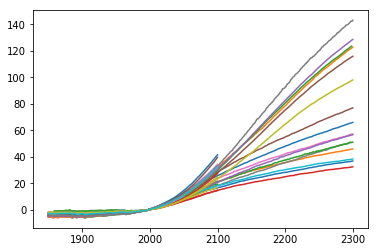

In [5]:
for scen in ['rcp45','rcp85']:
    mods = fun.models()
    for model in mods:
        steric(model,scen)